# 주성분분석 (패키지로)
* 패키지로 주성분분석을 해보자.
* 코드활용에 중점을 맞춘다

## 데이터 생성

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# 데이터 생성
D = np.diag([1, 2, 0.4, 0.5])
data = np.array([1, 0.6, 0.1, 0.3,
                 0.6, 1, 0.2, 0.4,
                 0.1, 0.2, 1, 0.5,
                 0.3, 0.4, 0.5, 1]).reshape(4, 4)
Sigma = np.sqrt(D) @ data @ np.sqrt(D)
mu = np.zeros(4)
n = 100
random_data = np.random.multivariate_normal(mu, Sigma, n)
scaled_data = StandardScaler().fit_transform(random_data)

## PCA 실행

In [3]:
# PCA 실행
pca = PCA()
pca.fit(scaled_data)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance) * 100

In [4]:
# 주성분분석 결과 출력
print("Explained variance ratio:", explained_variance)
print("Cumulative explained variance:", cumulative_variance)

# 주성분 표준편차 확인 (고유값의 제곱근)
print("Standard deviations (sqrt of eigenvalues):", np.sqrt(pca.explained_variance_))

Explained variance ratio: [0.56581167 0.25371123 0.0931038  0.08737331]
Cumulative explained variance: [ 56.58116672  81.95228935  91.26266903 100.        ]
Standard deviations (sqrt of eigenvalues): [1.51198801 1.01247018 0.61333266 0.59415778]


## 시각화

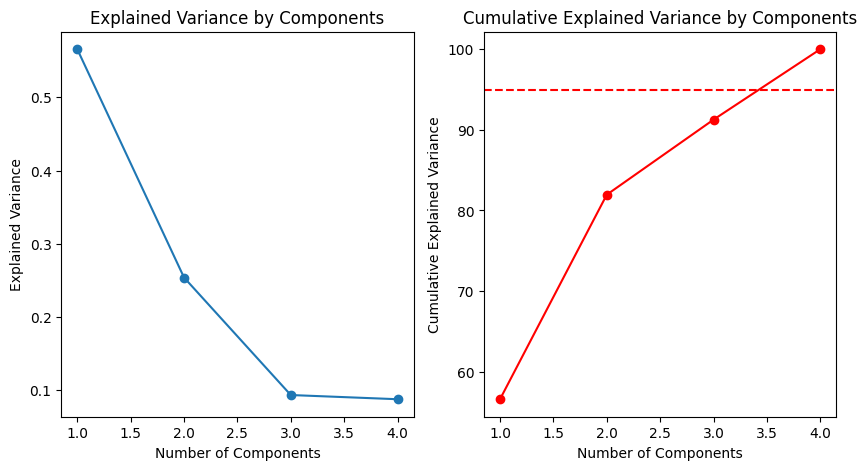

In [5]:
# 시각화
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, len(explained_variance) + 1), explained_variance, 'o-')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, 'o-r')
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=95, color='r', linestyle='--')
plt.show()

In [6]:
# Biplot 함수 정의
def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    plt.scatter(xs * scalex, ys * scaley, c='grey')
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0]* 1.15, coeff[i, 1] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0]* 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

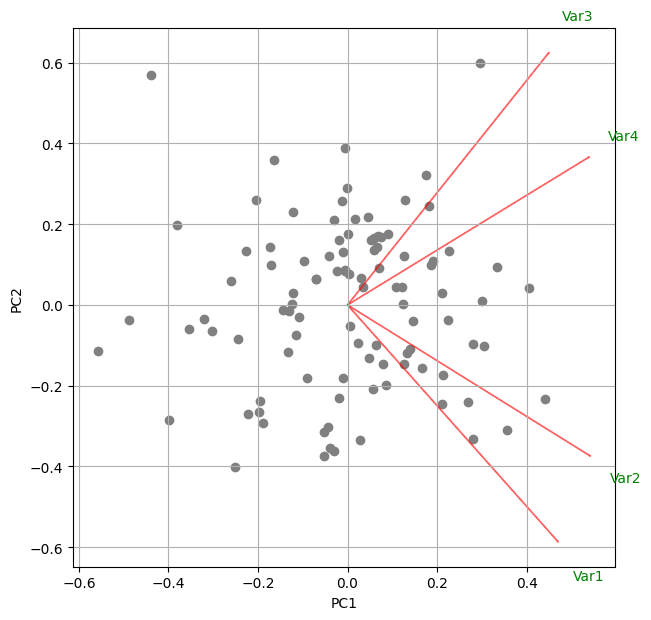

In [7]:
# Biplot 그리기
plt.figure(figsize=(7, 7))
biplot(pca.transform(scaled_data), np.transpose(pca.components_[0:2, :]))
plt.show()